In [149]:
"""
We import the raw data and preprocess according to the previous milestones.

The final version of training and testing data will be used to build several models, 
which are used to predict demand in ride sharing business.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 1: Import order data

In [5]:
order_info_read = pd.read_csv('data/training_order_data.csv')

In [7]:
order_info = order_info_read.sort_values('time_stamp')
order_info.columns = ['initial_row', 'order_id', 'driver_id', 'passenger_id', \
                      'start_district_hash', 'dest_district_hash', 'price', 'time_stamp']

In [8]:
order_info.head()

,initial_row,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,price,time_stamp
262258,262258,9a864e958859b506f5f8bee9d8dfff17,a323121d71cd5247f38a4848c2039cb1,b9bd961ee676441d64c8748aa18efcda,b05379ac3f9b7d99370d443cfd5dcc28,52d7b69796362a8ed1691a6cc02ddde4,45.0,2016-01-01 00:00:03
231406,231406,6732f74a5a59353cddb421ceb39f7c26,a57d4acc407006cbb4086f0cc60d2575,37e17d1ec5ca26d52be702ce74db64a6,4725c39a5e5f4c188d382da3910b3f3f,929ec6c160e6f52c20a4217c7978f681,18.0,2016-01-01 00:00:04
210341,210341,f4beb0739bcee0f040385d69b9809b92,0b41511d4c63ed4bb030bd9d5ed5399e,b684445572045febd51a63a4e478b356,b05379ac3f9b7d99370d443cfd5dcc28,4725c39a5e5f4c188d382da3910b3f3f,31.0,2016-01-01 00:00:04
268247,268247,1f5672197a352594fb546d7164a41f28,90f993e801c394a351321377de6820b3,7d61be2772673f4fb728c867fba64833,82cc4851f9e4faa4e54309f8bb73fd7c,82cc4851f9e4faa4e54309f8bb73fd7c,10.0,2016-01-01 00:00:05
188962,188962,7bd83a5dd61f5242f82c52075ad43cbf,f5307b86a4d3da55e3626b9048d9b54a,d6c7bb502d01aed1c5031e17957e44ec,f47f35242ed40655814bc086d7514046,1cbfbdd079ef93e74405c53fcfff8567,24.0,2016-01-01 00:00:05


In [9]:
initial_row = order_info['initial_row']
order_id = order_info['order_id']
driver_id = order_info['driver_id']
passenger_id = order_info['passenger_id']
start_district_hash = order_info['start_district_hash']
dest_district_hash = order_info['dest_district_hash']
price = order_info['price']
time_stamp = pd.to_datetime(order_info['time_stamp'])

In [11]:
order_id_num = len(order_id)
order_id_num_unique = len(order_id.unique())
print('total order_id:', order_id_num)
print('unique order_id:', order_id_num_unique)

total order_id: 8540614
unique order_id: 8518049


In [13]:
driver_id_null = pd.isnull(driver_id)
driver_id_num = len(driver_id)
driver_id_num_unique = len(driver_id.unique())
driver_id_num_null = len(driver_id[driver_id_null])
print('total driver_id:', driver_id_num)
print('unique driver_id:', driver_id_num_unique)
print('null driver_id:', driver_id_num_null)
print('fraction of missed orders:', float(driver_id_num_null) / float(driver_id_num))
print('fraction of received orders:', 1.0 - float(driver_id_num_null) / float(driver_id_num))

total driver_id: 8540614
unique driver_id: 93090
null driver_id: 1516460
fraction of missed orders: 0.17755866264416117
fraction of received orders: 0.8224413373558388


In [14]:
passenger_id_num = len(passenger_id)
passenger_id_num_unique = len(passenger_id.unique())
print('total passenger_id:', passenger_id_num)
print('unique passenger_id:', passenger_id_num_unique)
print('orders per passenger:', float(passenger_id_num) / float(passenger_id_num_unique))

total passenger_id: 8540614
unique passenger_id: 1368071
orders per passenger: 6.242814883145685


In [15]:
start_district_hash_num = len(start_district_hash)
start_district_hash_num_unique = len(start_district_hash.unique())
print('total start_district_hash:', start_district_hash_num)
print('unique start_district_hash:', start_district_hash_num_unique)

total start_district_hash: 8540614
unique start_district_hash: 66


In [16]:
dest_district_hash_num = len(dest_district_hash)
dest_district_hash_num_unique = len(dest_district_hash.unique())
print('total dest_district_hash:', dest_district_hash_num)
print('unique dest_district_hash:', dest_district_hash_num_unique)

total dest_district_hash: 8540614
unique dest_district_hash: 793


In [17]:
price_num = len(price)
price_num_unique = len(price.unique())
price_max = price.max()
price_min = price.min()
print('total price:', price_num)
print('unique price:', price_num_unique)
print('max price:', price_max)
print('min price:', price_min)

total price: 8540614
unique price: 2171
max price: 1731.0
min price: 0.0


In [18]:
time_stamp_num = len(time_stamp)
time_stamp_num_unique = len(time_stamp.unique())
print('total time_stamp:', time_stamp_num)
print('unique time_stamp:', time_stamp_num_unique)

total time_stamp: 8540614
unique time_stamp: 1534340


# 2: Import cluster map data

In [19]:
df_read = pd.read_csv('data/cluster_map.csv', index_col=0)
cluster_map_read = df_read.to_dict('dict')['0']

In [23]:
cluster_map_read

{'08232402614a9b48895cc3d0aeb0e9f2': 50,
 '08f5b445ec6b29deba62e6fd8b0325a6': 43,
 '0a5fef95db34383403d11cb6af937309': 63,
 '1afd7afbc81ecc1b13886a569d869e8a': 46,
 '1c60154546102e6525f68cb4f31e0657': 56,
 '1cbfbdd079ef93e74405c53fcfff8567': 6,
 '1ecbb52d73c522f184a6fc53128b1ea1': 66,
 '2301bc920194c95cf0c7486e5675243c': 31,
 '2350be163432e42270d2670cb3c02f80': 18,
 '2407d482f0ffa22a947068f2551fe62c': 28,
 '2920ece99323b4c111d6f9affc7ea034': 14,
 '307afa4120c590b3a46cf4ff5415608a': 16,
 '364bf755f9b270f0f9141d1a61de43ee': 21,
 '38d5ad2d22b61109fd8e7b43cd0e8901': 24,
 '3a43dcdff3c0b66b1acb1644ff055f9d': 25,
 '3e12208dd0be281c92a6ab57d9a6fb32': 47,
 '445ff793ebd3477d4a2e0b36b2db9271': 55,
 '44c097b7bd219d104050abbafe51bd49': 35,
 '4725c39a5e5f4c188d382da3910b3f3f': 23,
 '49ac89aa860c27e26c0836cb8dab2df2': 60,
 '4b7f6f4e2bf237b6cc58f57142bea5c0': 13,
 '4b9e4cf2fbdc8281b8a1f9f12b80ce4d': 5,
 '4f4041f7db0c7f69892d9b74c1a7efa1': 10,
 '4f8d81b5c31af5d1ba579a65ddc8a5cb': 38,
 '52a4e8aaa12f7002

# 3: Get rid of NULL orders and out-of-town orders

In [24]:
driver_to_clean = driver_id_null

In [27]:
percent = 500000

for i in range(int(order_id_num)):
    des_hash = dest_district_hash.iloc[i]
    if des_hash not in cluster_map_read.keys():
        driver_to_clean.iloc[i] = True
    if i % percent == 0:
        print(i / float(order_id_num) * 100, '% finished')

0.0 % finished
5.854380024668016 % finished
11.708760049336032 % finished
17.563140074004046 % finished
23.417520098672064 % finished
29.271900123340078 % finished
35.12628014800809 % finished
40.98066017267611 % finished
46.83504019734413 % finished
52.68942022201214 % finished
58.543800246680156 % finished
64.39818027134817 % finished
70.25256029601618 % finished
76.1069403206842 % finished
81.96132034535222 % finished
87.81570037002024 % finished
93.67008039468826 % finished
99.52446041935626 % finished


In [63]:
order_info_cleaned = order_info[~driver_to_clean]
time_stamp_cleaned = pd.to_datetime(order_info_cleaned['time_stamp'])
order_info_cleaned['time_stamp'] = time_stamp_cleaned

/afs/ir.stanford.edu/group/bil/env/jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
order_left_num = len(order_info_cleaned)
print(order_left_num, 'orders left')

5914153 orders left


In [65]:
order_info_cleaned.head()

,initial_row,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,price,time_stamp
262258,262258,9a864e958859b506f5f8bee9d8dfff17,a323121d71cd5247f38a4848c2039cb1,b9bd961ee676441d64c8748aa18efcda,b05379ac3f9b7d99370d443cfd5dcc28,52d7b69796362a8ed1691a6cc02ddde4,45.0,2016-01-01 00:00:03
231406,231406,6732f74a5a59353cddb421ceb39f7c26,a57d4acc407006cbb4086f0cc60d2575,37e17d1ec5ca26d52be702ce74db64a6,4725c39a5e5f4c188d382da3910b3f3f,929ec6c160e6f52c20a4217c7978f681,18.0,2016-01-01 00:00:04
210341,210341,f4beb0739bcee0f040385d69b9809b92,0b41511d4c63ed4bb030bd9d5ed5399e,b684445572045febd51a63a4e478b356,b05379ac3f9b7d99370d443cfd5dcc28,4725c39a5e5f4c188d382da3910b3f3f,31.0,2016-01-01 00:00:04
268247,268247,1f5672197a352594fb546d7164a41f28,90f993e801c394a351321377de6820b3,7d61be2772673f4fb728c867fba64833,82cc4851f9e4faa4e54309f8bb73fd7c,82cc4851f9e4faa4e54309f8bb73fd7c,10.0,2016-01-01 00:00:05
188962,188962,7bd83a5dd61f5242f82c52075ad43cbf,f5307b86a4d3da55e3626b9048d9b54a,d6c7bb502d01aed1c5031e17957e44ec,f47f35242ed40655814bc086d7514046,1cbfbdd079ef93e74405c53fcfff8567,24.0,2016-01-01 00:00:05


In [66]:
print('first order:')
print(order_info_cleaned.iloc[0])

first order:
initial_row                                      262258
order_id               9a864e958859b506f5f8bee9d8dfff17
driver_id              a323121d71cd5247f38a4848c2039cb1
passenger_id           b9bd961ee676441d64c8748aa18efcda
start_district_hash    b05379ac3f9b7d99370d443cfd5dcc28
dest_district_hash     52d7b69796362a8ed1691a6cc02ddde4
price                                                45
time_stamp                          2016-01-01 00:00:03
Name: 262258, dtype: object


In [67]:
print('last order:')
print(order_info_cleaned.iloc[len(order_info_cleaned)-1])

last order:
initial_row                                      259969
order_id               3831a13720589ff58a3c047fa649c80f
driver_id              3ca1d4ef5e4802ef869c85dc973dee67
passenger_id           234f2901f37d77513e985890603df6c9
start_district_hash    ca064c2682ca48c6a21de012e87c0df5
dest_district_hash     52a4e8aaa12f70020e889aed8fd5ddbc
price                                                 9
time_stamp                          2016-01-21 23:59:58
Name: 8326243, dtype: object


# 4: Cut orders into pieces

In [82]:
interval_in_minute = 5 # one slot is 5 minutes long
interval_num = int(24 * 60 * 21 / interval_in_minute) # 24 hours * 60 minutes * 21 days
print(interval_num, 'time slots')

6048 time slots


In [84]:
def delta_second(time_stamp_1, time_stamp_2):
    '''
    Returns the time in second between 2 time stamps
    '''
    delta_time = time_stamp_2 - time_stamp_1
    return int(delta_time.total_seconds())

In [94]:
start_time = order_info_cleaned['time_stamp'].iloc[0]
delta_time = pd.Timedelta(minutes=interval_in_minute)
end_time = start_time + delta_time

start_row = 0
end_row = None

orders_in_group = [] # a list of DataFrame, whose length should be 6048

delta_time = pd.Timedelta(minutes=interval_in_minute)

for i in range(order_left_num):
    if i % percent == 0:
        print(i / float(order_left_num) * 100, '% finished')
    cur_time = order_info_cleaned['time_stamp'].iloc[i]
    if delta_second(cur_time, end_time) < 0: # reach an end
        end_row = i
        orders_in_group.append(order_info_cleaned.iloc[start_row:end_row])
        start_time = end_time
        end_time = start_time + delta_time
        start_row = end_row
        #print('start_time:', start_time)
        continue
           
orders_in_group.append(order_info_cleaned.iloc[start_row:]) # add the last group

0.0 % finished
8.454295991327921 % finished
16.908591982655842 % finished
25.362887973983767 % finished
33.817183965311685 % finished
42.27147995663961 % finished
50.725775947967534 % finished
59.18007193929545 % finished
67.63436793062337 % finished
76.0886639219513 % finished
84.54295991327922 % finished
92.99725590460713 % finished


In [95]:
group_num = len(orders_in_group)
print(group_num, 'data points for training and testing')

6048 data points for training and testing


In [97]:
t = np.arange(group_num)
order_distribution = np.zeros(t.shape)
for i in range(len(orders_in_group)):
    order_distribution[i] = len(orders_in_group[i])

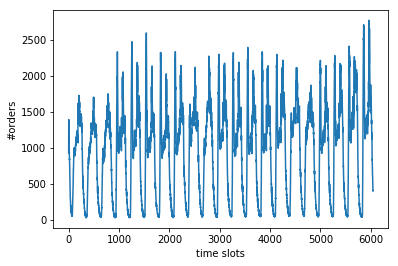

In [99]:
plt.plot(t, order_distribution)
plt.xlabel('time slots')
plt.ylabel('#orders')
plt.show()

# 5: Build training and testing data

In [136]:
def day(i):
    '''
    Returns an integer ranging from 0 to 6, 
    which indicates the day of week corresponding to the time slot i.
    '''
    date = int(i) / 288
    #print('date:', date)
    day = int(date) % 7
    return int(day)

In [140]:
def hour(i):
    '''
    Returns an integer ranging from 0 to 23, 
    which indicates the hour of day corresponding to the time slot i.
    '''
    group = int(i) / 12
    hour = int(group) % 24
    return int(hour)

In [147]:
Y = np.zeros((interval_num, start_district_hash_num_unique))
print('Y.shape:', Y.shape)

feature_dim = 24 + 7 + 66 + 66 * 66
X = np.zeros((interval_num, feature_dim))
print('X.shape:', X.shape)

percent = 300

for i in range(interval_num):
    orders = orders_in_group[i]
    hour_time = hour(i)
    day_time = day(i)
    X[i, hour_time] = 1
    X[i, 24 + day_time] = 1
    for j in range(len(orders)):
        sta = cluster_map_read[orders['start_district_hash'].iloc[j]] - 1
        des = cluster_map_read[orders['dest_district_hash'].iloc[j]] - 1
        X[i, 24 + 7 + sta] += 1
        X[i, 24 + 7 + 66 + 66*sta + des] += 1
        Y[i, sta] += 1
    if i % percent == 0:
        print(i / float(interval_num) * 100, '% finished')
    

Y.shape: (6048, 66)
X.shape: (6048, 4453)
0.0 % finished
4.9603174603174605 % finished
9.920634920634921 % finished
14.880952380952381 % finished
19.841269841269842 % finished
24.801587301587304 % finished
29.761904761904763 % finished
34.72222222222222 % finished
39.682539682539684 % finished
44.642857142857146 % finished
49.60317460317461 % finished
54.563492063492056 % finished
59.523809523809526 % finished
64.48412698412699 % finished
69.44444444444444 % finished
74.40476190476191 % finished
79.36507936507937 % finished
84.32539682539682 % finished
89.28571428571429 % finished
94.24603174603175 % finished
99.20634920634922 % finished


In [148]:
np.save('X.npy', X)
np.save('Y.npy', Y)